<a href="https://colab.research.google.com/github/Arjun270/Machine-Learning/blob/main/RNN_using_Tensorflow_with_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
encoder = LabelEncoder()

# Fit the encoder and transform the labels
data['Category'] = encoder.fit_transform(data['Category'])


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(data['Message'], data['Category'], test_size=0.2)

In [ ]:
X_test

4254    Juz now havent woke up so a bit blur blur... C...
3104    U so lousy, run already come back then half de...
5520                     No. I dont want to hear anything
924     She went to attend another two rounds today..b...
1653    For ur chance to win a £250 cash every wk TXT:...
                              ...                        
962     URGENT! We are trying to contact U. Todays dra...
449            LOL ... Have you made plans for new years?
26                         Lol your always so convincing.
1060    EASTENDERS TV Quiz. What FLOWER does DOT compa...
4480                               Erutupalam thandiyachu
Name: Message, Length: 1115, dtype: object

In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 100
max_len = 10
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
vectorize_layer.adapt(X_train)

In [ ]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'i',
 'to',
 'you',
 'a',
 'the',
 'u',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'of',
 'it',
 'have',
 'call',
 'on',
 'are',
 'that',
 '2',
 'now',
 'im',
 'not',
 'but',
 'so',
 'or',
 'at',
 'be',
 'ur',
 'get',
 'can',
 'with',
 'if',
 'do',
 'will',
 'just',
 'no',
 'we',
 'this',
 'its',
 'up',
 'when',
 '4',
 'dont',
 'all',
 'ok',
 'go',
 'free',
 'from',
 'out',
 'ltgt',
 'know',
 'how',
 'what',
 'ill',
 'then',
 'like',
 'good',
 'was',
 'got',
 'come',
 'am',
 'time',
 'only',
 'day',
 'text',
 'want',
 'love',
 'he',
 'there',
 'send',
 'as',
 'need',
 'about',
 'sorry',
 'going',
 'one',
 'by',
 'txt',
 'lor',
 'see',
 'reply',
 'r',
 'home',
 'stop',
 'still',
 'our',
 'back',
 'today',
 'n',
 'later',
 'tell',
 'well',
 'she',
 'da',
 'cant',
 'mobile']

In [ ]:
vectorize_layer.get_weights()

[array([b'i', b'to', b'you', b'a', b'the', b'u', b'and', b'in', b'is',
        b'me', b'my', b'for', b'your', b'of', b'it', b'have', b'call',
        b'on', b'are', b'that', b'2', b'now', b'im', b'not', b'but', b'so',
        b'or', b'at', b'be', b'ur', b'get', b'can', b'with', b'if', b'do',
        b'will', b'just', b'no', b'we', b'this', b'its', b'up', b'when',
        b'4', b'dont', b'all', b'ok', b'go', b'free', b'from', b'out',
        b'ltgt', b'know', b'how', b'what', b'ill', b'then', b'like',
        b'good', b'was', b'got', b'come', b'am', b'time', b'only', b'day',
        b'text', b'want', b'love', b'he', b'there', b'send', b'as',
        b'need', b'about', b'sorry', b'going', b'one', b'by', b'txt',
        b'lor', b'see', b'reply', b'r', b'home', b'stop', b'still', b'our',
        b'back', b'today', b'n', b'later', b'tell', b'well', b'she', b'da',
        b'cant', b'mobile'], dtype=object)]

In [ ]:
model.add(vectorize_layer)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Embedding

# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 8))

In [ ]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# 64 is the "units" parameter, which is the
# dimensionality of the output space.
model.add(LSTM(16))


In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 10, 8)             808       
                                                                 
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2697 (10.54 KB)
Trainable params: 2697 (10.54 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
140/140 [==============================] - 5s 18ms/step - loss: 0.3838 - accuracy: 0.8694
Epoch 2/100
140/140 [==============================] - 1s 9ms/step - loss: 0.2062 - accuracy: 0.9221
Epoch 3/100
140/140 [==============================] - 1s 7ms/step - loss: 0.1773 - accuracy: 0.9383
Epoch 4/100
140/140 [==============================] - 1s 9ms/step - loss: 0.1685 - accuracy: 0.9414
Epoch 5/100
140/140 [==============================] - 1s 6ms/step - loss: 0.1651 - accuracy: 0.9403
Epoch 6/100
140/140 [==============================] - 1s 8ms/step - loss: 0.1611 - accuracy: 0.9446
Epoch 7/100
140/140 [==============================] - 2s 11ms/step - loss: 0.1596 - accuracy: 0.9459
Epoch 8/100
140/140 [==============================] - 1s 8ms/step - loss: 0.1584 - accuracy: 0.9450
Epoch 9/100
140/140 [==============================] - 1s 6ms/step - loss: 0.1574 - accuracy: 0.9468
Epoch 10/100
140/140 [==============================] - 1s 6ms/step - loss: 0.1566 - accu

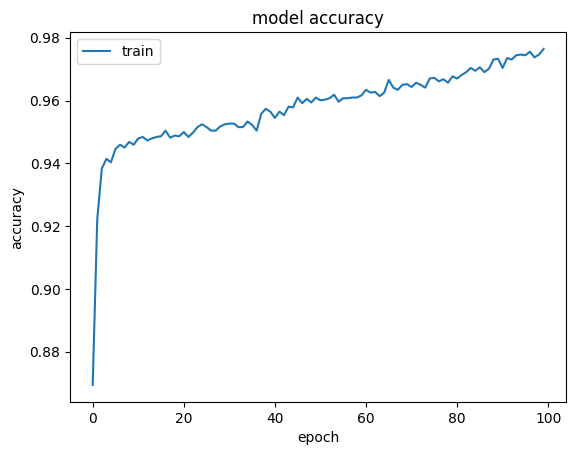

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

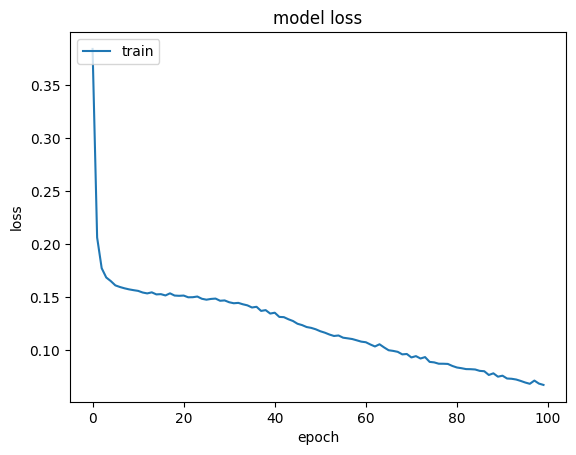

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.predict([
  "Free entry in 2 a wkly comp to win FA Cup fina...",
]))

1/1 [==============================] - 0s 376ms/step
[[0.99861157]]


In [ ]:
print(model.predict([
  "Where are you Dear",
]))

1/1 [==============================] - 0s 33ms/step
[[0.00087057]]


In [ ]:
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape)

(101, 8)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# read from file in tsv format
words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
words

array(['i', 'to', 'you', 'a', 'the', 'u', 'and', 'in', 'is', 'me', 'my',
       'for', 'your', 'of', 'it', 'have', 'call', 'on', 'are', 'that',
       '2', 'now', 'im', 'not', 'but', 'so', 'or', 'at', 'be', 'ur',
       'get', 'can', 'with', 'if', 'do', 'will', 'just', 'no', 'we',
       'this', 'its', 'up', 'when', '4', 'dont', 'all', 'ok', 'go',
       'free', 'from', 'out', 'ltgt', 'know', 'how', 'what', 'ill',
       'then', 'like', 'good', 'was', 'got', 'come', 'am', 'time', 'only',
       'day', 'text', 'want', 'love', 'he', 'there', 'send', 'as', 'need',
       'about', 'sorry', 'going', 'one', 'by', 'txt', 'lor', 'see',
       'reply', 'r', 'home', 'stop', 'still', 'our', 'back', 'today', 'n',
       'later', 'tell', 'well', 'she', 'da', 'cant', 'mobile'],
      dtype='<U6')

In [ ]:
vectors = np.loadtxt('vecs.tsv', skiprows=1)
vectors

array([[-2.47361180e-01, -2.09015440e-01,  1.10194560e+00,
         3.05843680e-01,  6.54113500e-01, -3.24712960e-01,
         8.24366000e-02,  2.07687300e-01],
       [ 1.63729820e-01,  1.01819260e-02, -2.58952680e-01,
        -2.54505280e-02, -1.11710690e-01,  2.84482120e-01,
        -2.41093730e-02, -3.08359300e-01],
       [-1.38375630e-01, -1.27488240e-01,  3.45208700e-02,
         7.78589100e-02,  7.82074300e-02,  1.48344240e-02,
         1.21447300e-01, -4.64978100e-03],
       [-3.73528340e-02,  2.41701440e-02, -2.06365560e-01,
        -9.75503850e-02, -7.13337360e-02, -2.02040560e-02,
        -1.12173595e-01,  1.08681580e-01],
       [ 8.84697500e-02, -4.91336600e-02,  2.33480650e-01,
         1.07800880e-01,  1.24235410e-02,  9.38948600e-02,
         1.04281610e-01, -1.70867280e-01],
       [-3.85311000e-03, -5.07168920e-02, -9.03429200e-02,
         4.98559800e-02, -2.88572260e-02, -3.39750900e-02,
         2.98403430e-02,  5.77911850e-02],
       [-1.69926620e-02, -2.121652

In [ ]:
import plotly.express as px

fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
fig.show()

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 10, 2)             202       
                                                                 
 simple_rnn (SimpleRNN)      (None, 10, 16)            304       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                      

In [ ]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model2.fit(X_train, y_train, epochs=100)


Epoch 1/100
140/140 [==============================] - 10s 50ms/step - loss: 0.4373 - accuracy: 0.8510
Epoch 2/100
140/140 [==============================] - 4s 27ms/step - loss: 0.2741 - accuracy: 0.8957
Epoch 3/100
140/140 [==============================] - 3s 24ms/step - loss: 0.1864 - accuracy: 0.9307
Epoch 4/100
140/140 [==============================] - 5s 33ms/step - loss: 0.1748 - accuracy: 0.9336
Epoch 5/100
140/140 [==============================] - 3s 24ms/step - loss: 0.1649 - accuracy: 0.9392
Epoch 6/100
140/140 [==============================] - 3s 21ms/step - loss: 0.1605 - accuracy: 0.9412
Epoch 7/100
140/140 [==============================] - 3s 21ms/step - loss: 0.1582 - accuracy: 0.9430
Epoch 8/100
140/140 [==============================] - 4s 32ms/step - loss: 0.1538 - accuracy: 0.9446
Epoch 9/100
140/140 [==============================] - 3s 21ms/step - loss: 0.1587 - accuracy: 0.9437
Epoch 10/100
140/140 [==============================] - 3s 22ms/step - loss: 0.15

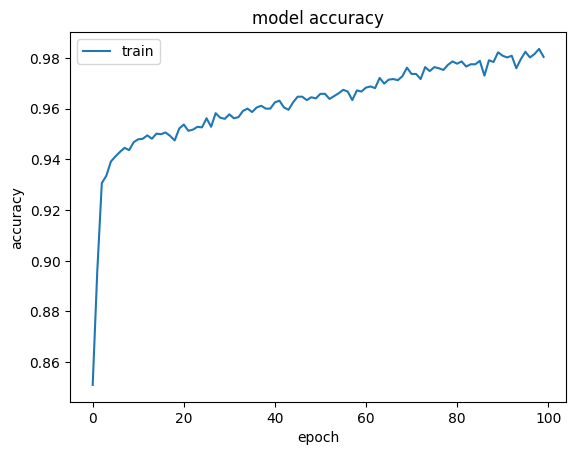

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()